In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("DailyDelhiClimateTrain.csv")

In [6]:
print(data.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


In [8]:
print(data.isnull().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [11]:
fig = px.line(data,
              x="date",
              y="meantemp",
              title="mean temperature in New Delhi over the years")
fig.show()

In [13]:
fig = px.line(data,
              x="date",
              y="humidity",
              title="humidity across the years")
fig.show()

In [15]:
fig = px.line(data,
              x="date",
              y="wind_speed",
              title="Wind speed over the years")
fig.show()

In [38]:
fig = px.scatter(data,
             x="humidity",
             y="meantemp",
             trendline="ols",
             title="relation between the humidity and mean temperature in new delhi")
fig.show()

In [40]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d') # changing the format of the date column
# adding 3 columns for the day, year and month in order to make more analysis with respect to the time
data['year'] = data['date'].dt.year 
data["month"] = data["date"].dt.month
data["day"] = data["date"].dt.day
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month  day
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1    1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1    2
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1    3
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1    4
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1    5


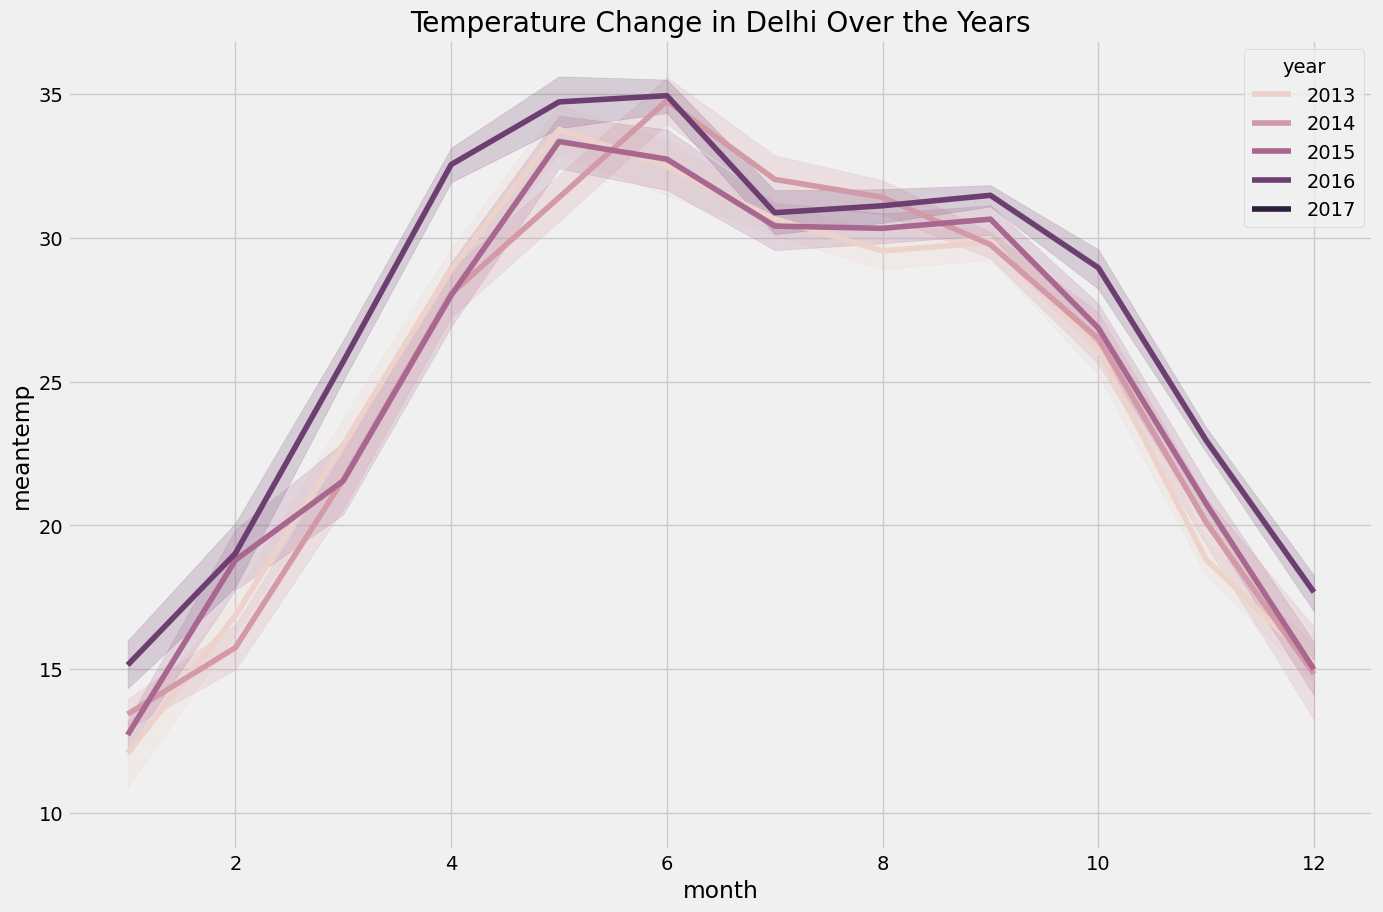

In [46]:
plt.style.use('fivethirtyeight') # adding a grid
plt.figure(figsize=(15, 10)) # figure size
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

In [53]:
# changing the column names in order to use them in the prophet model it takes in date as ds and the label as y
forecast_data = data.rename(columns = {"date": "ds", 
                                       "meantemp": "y"})
print(forecast_data.head())

          ds          y   humidity  wind_speed  meanpressure  year  month  day
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1    1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1    2
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1    3
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1    4
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1    5


In [52]:
# using facebook prophet model in order to predict the weather until 2026
from prophet import Prophet
from prophet.plot import plot_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=3650)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

21:17:52 - cmdstanpy - INFO - Chain [1] start processing
21:17:52 - cmdstanpy - INFO - Chain [1] done processing
